In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  widget

In [2]:
# instead of copying the okada code to this folder, cd into the correct one, import it, then go back to the folder this notebook is in. 
%cd ..
%cd 19_Okada_model
import okada
from patch_geometry import ver2patchconnect
%cd ../18_synthetic_fault

/mnt/data/LagunaSalada/Notebooks_github
/mnt/data/LagunaSalada/Notebooks_github/19_Okada_model
/mnt/data/LagunaSalada/Notebooks_github/18_synthetic_fault


Plot a cross section across a fault that dips ~71 degrees, strike slip 

In [3]:
# Set of parameters for ~LS fault, Sierra El-Mayor 2010 EQ. 
# Gonzalez-Ortega et al., 2014
# Right lateral strike-slip, 120 km-long rupture (surface rupture? or this is length of fault slip?)
# seismogenic zone extending to a depth of ~10 km: Castro et al., 2011

xcen = 0        # center is in middle of region
ycen = 0        # center is in middle of region 
U = -1.0        # for now, 1 m of right-lateral slip. (positive is left-lateral)
#U = -4.0       # this is maximum slip from EQ- negative makes sure it's right-lateral 
d = 5000        # shallow d=depth to CENTROID of fault surface. Not the top surface.
                # d must be >half of width, otherwise it ruptures into the air - not feasible
nu = 0.27       # using the default value here
delta = 71      # using fault segment 3 from Fialko et al., 2010
#strike = 308   # using fault segment 3, clockwise from north 
strike=0
#length = 13480 # using fault segment 3 
length = 100000 # this is only a little less than the total length of all segments that had some slip 
width = 10000   # up to depth 10 km 
fault_type = 1  # strike-slip 

In [4]:
# loop over x values to make a transect right across the middle of the fault (100 km long, N-S trending)
x_vals = np.arange(-100,100,0.1)
dx = len(x_vals)
print('Looping over '+str(dx)+' x-values to make transect.')

# initialize array for the east, north, and up components along that transect
transect_east  = np.ndarray(shape=(dx,),dtype='float')
transect_north = np.ndarray(shape=(dx,),dtype='float')
transect_up    = np.ndarray(shape=(dx,),dtype='float')

for x in range(dx):
    x_temp = x_vals[x]
    ue,un,uz = okada.forward(x=x_temp*1000, y=0.0, xcen=xcen, ycen=ycen, \
                         depth=d, length=length, width=width, \
                         slip=U, opening=0.0,  \
                         strike=strike, dip=delta, rake=0.0, \
                         nu=nu)
    # now put the east,north,up displacements into their respective transect
    transect_east[x] = ue
    transect_north[x] = un
    transect_up[x] = uz

Looping over 2000 x-values to make transect.


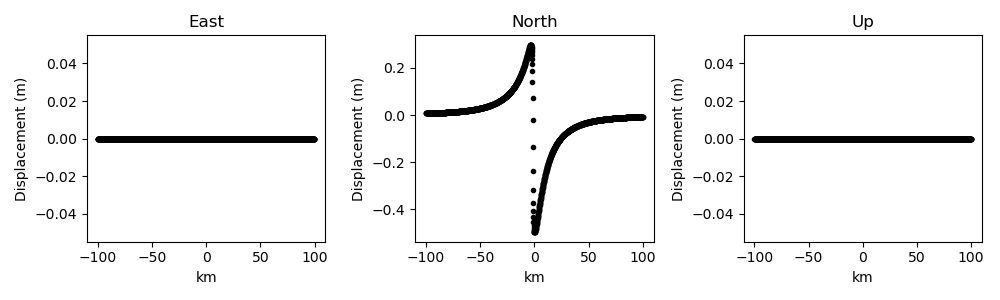

In [5]:
# plot the transects 
plt.figure(figsize=(10,3),tight_layout=True)
plt.subplot(1,3,1)
plt.plot(x_vals,transect_east,'k.')
plt.xlabel('km')
plt.ylabel('Displacement (m)')
plt.title('East')
plt.subplot(1,3,2)
plt.plot(x_vals,transect_north,'k.')
plt.xlabel('km')
plt.ylabel('Displacement (m)')
plt.title('North')
plt.subplot(1,3,3)
plt.plot(x_vals,transect_up,'k.')
plt.xlabel('km')
plt.ylabel('Displacement (m)')
plt.title('Up')
plt.show()

In [6]:
# fault structure object (list) for inputting into geometry function to plot it in 3D.
faultstruct = [
    {
        'L': length,                # Length of the fault (along-strike)
        'W': width,                 # Width of the fault (down-dip)
        'strike': strike,              # Strike angle in degrees
        'dip': delta,                  # Dip angle in degrees
        'zt': d-width/2,                  # Top depth of the fault
        'vertices': np.array([
            [0.0, 0.0],             # x coordinates of fault endpoints
            [0.0, 0.0]              # y coordinates of fault endpoints
        ])                          # I think the important part is that the average X is the fault top line midpoint X value, same for Y 
    }]

In [7]:
# now run it through the patch_geometry code
targetLp = 3   # total subdivisions along the length (L)
Wp = 2         # number of subdivisions along width (W)
# how many faults per break, put this in brackets always (even if just one segment),  
faultnp=[1]     # 2 faults, no breaks would be [1,1]
patchstruct, totLp, Wp_output, Lps = ver2patchconnect(faultstruct,targetLp,Wp,faultnp)
# what do the contents look like? 
print(patchstruct[0]['xfault'])
print(patchstruct[0]['yfault'])
print(patchstruct[0]['zfault'])

[   0.            0.         1627.84077229 1627.84077229    0.        ]
[-16666.66666667 -50000.         -50000.         -16666.66666667
 -16666.66666667]
[   0.          0.       4727.592878 4727.592878    0.      ]


In [8]:
ls_x = [-2,  -40, -40,  -2, -2 ]
ls_y = [-25, -25,  25,  25, -25]
ls_z = [0.0, 0.0, 0.0, 0.0, 0.0]
ls_z_2=[0.1, 0.1, 0.1, 0.1, 0.1]

In [9]:
# for i in range(dx):
#     print(i, x_vals[i])

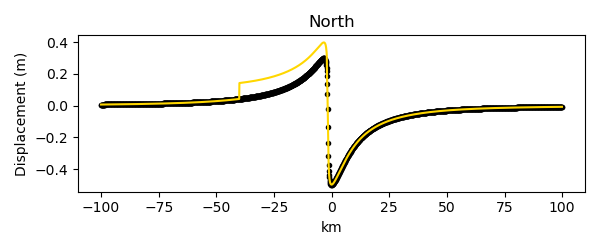

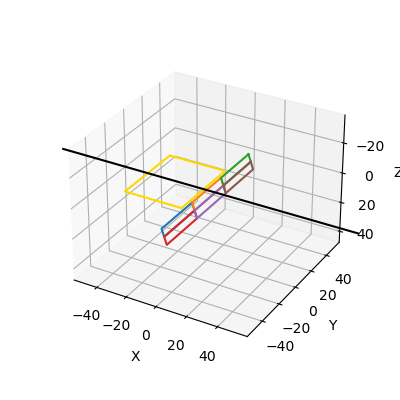

In [10]:
# The north one is all that matters, really. 
# plot the transect location right on top. 

plt.figure(figsize=(6,2.5),tight_layout=True)
plt.plot(x_vals,transect_north,'k.')
transect_north_adjusted = transect_north.copy()
# ind_start = x_vals.index(-40000)
# ind_end   = x_vals.index(0)
transect_north_adjusted[600:980] = transect_north_adjusted[600:980] + 0.1
plt.plot(x_vals,transect_north_adjusted,color='gold')
plt.xlabel('km')
plt.ylabel('Displacement (m)')
plt.title('North')

# 3D plot of fault patch corners 
ax = plt.figure(figsize=(4,4)).add_subplot(projection='3d')
for i in range(len(patchstruct)):
    # add the patch to the 3D plot 
    ax.plot(patchstruct[i]['xfault']/1000,patchstruct[i]['yfault']/1000,zs=patchstruct[i]['zfault']/1000)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z') # flipping this axis didn't do anything, with 2 methods. Just have to manually rotate it to show + values as down/depth 
ax.axis('equal')
ax.plot(ls_x,ls_y,zs=ls_z,color='gold')
#ax.plot(ls_x,ls_y,zs=ls_z_2,color='gold') # would have to exaggerate the z-axis in order to see the difference in the plot. 
ax.plot([x_vals[0], x_vals[-1]],[0.0, 0.0],zs=[0.0, 0.0],color='k')
ax.invert_zaxis()